<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Alumnos:** Berlín Isabel Preciado Escalera, Mateo Verea Dorantes y Cuauhemoc Corrales Camacho

**Fecha:** 14 de octubre del 2021

**Expediente** : if723259,if709396 y if720482
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/berlinpreciado21/ProyectoSimFin_CCorrales_BIPreciado_MVerea




# Proyecto 
> Se especifican los componentes básicos que deberá tener cada proyecto. El proyecto debe ser un problema que utilice datos reales, ya sea de una empresa física real o de alguna página de internet que proporcione bases de datos confiables. Con la información obtenida, se pretende utilizar todas las herramientas vistas durante el curso para la correcta modelación y simulación del problema con ciertas variables de interés.

### 1.1 Título
### Predicción, compras de clientes en un supermercado 

### 1.2 Objetivos.
> #### 1.1 Objetivo general.
>  -  Predecir el impacto y comportamiento de futuras compras realizadas en distintos sitios apartir de sus preferencias al realizar una compra.
> #### 1.2 Objetivos específicos.  
>  - Descargar los datos disponibles y limpiar nuestra base de datos.
>  - Analizar la composición de cada una de las variables para determinar que distribuciones se aproximan de mejor manera
>  - Simular nuestras variables de interés en función a la distribución observada para cada una en un período futuro.


### 1.3 Definición del problema.
>El drastico cambió que provocó el virus COVID-19, causó que el comercio electronico aumentara para adquirir productos básicos por la necesidad de quedarse en casa, el distanciamiento social, el confinamiento y otras medidas tomadas en respuesta a la pandemia han llevado a los consumidores a aumentar las compras en línea. Esta tendencia, que comenzó en el confinamiento y que desde entonces ha perdurado, está obligando a supermercados a revisar su plan comercial para adaptarse a los nuevos hábitos, COVID-19 ha hecho que los consumidores alrededor del mundo estén adaptando nuevas tendencias de consumo, menos visitas a puntos de ventas, compras más grandes, visitas a supermercados más cerca del hogar, compras por internet, etc. 
>
>En este proyecto, buscaremos predecir el impacto y la preferencia que pueden tener los compradores al momento de realizar una compra y al sitio al que incurren para realizarla, ya sea mediante una compra en línea, en tienda o catalógo.Para esto nos basaremos en ciertos aspectos importantes, las preferencias del cliente en el sitio y en el producto.

### 1.4  Escenario de negocio a modelar 


 >El escenario a modelar son las distintas compras que la muestra de clientes realizó tras una serie de campañas promocionales. Se simularán escenarios de compras que los clientes en un próximo horizonte de tiempo con el objetivo de afirmar si las campañas aumentaran el número de compras y los ingresos generados hacia la empresa comercial. La finalidad de la simulación es ver el comportamiento que un cliente con denotaciones similares a aquellos en la muestra puede mostrar en un futuro, ver que grupo de productos son más comprados y que medio de compra es el más utilizado.  

### 1.5 Nodos o escenarios a simular

>La base de datos descargada cuenta con 17 variables que se clasifican en 3 grupos: atributos del cliente, atributos de producto y atributos de lugar. Los atributos del cliente se refieren a datos que identifican a cada individuo, dentro de estos datos se tomara la variable “income” como una variable de salida, debido a que representa el objetivo de toda empresa, sus ganancias por ventas. Los atributos de producto se refieren al tipo de producto que la cadena comercial maneja, los agrupa en 5 secciones. Finalmente, los atributos de lugar describen el medio por el cual se realizó la compra, son tres diferentes métodos y todos se considerarán como nodos a analizar para tras las simulaciones descubrir cual medio de venta es el que genera mayores ganancias.  

### 1.6 Definición de hipótesis y supuestos.

>OBJETO DE ESTUDIO:
>- Como las compras en linea aumentan dependiendo de las campañas promocionales que utilizan las empresas y el impacto que la pandemia por Covid-19 afectó.
>
>HIPOTESIS: 
>- Las campañas promocionales y la pandemia por Covid-19 han aumentado exponencialmente las ventas en linea de casi todos los productos.
>
>SUPUESTOS: 
>- La gente ya no quiere salir de su casa para hacer compras.
>- Las campañas de promoción son fundamentales para las ventas en linea
>- La pandemia aumento el uso de plataformas de venta en linea.
>- La distribucion de las compras por sitio web son: 
$$0<x<5, P = 74.29\%$$
$$6<x<10, P = 23.79\%$$
$$10<x, P = 1.92\%$$

>- La distribucion de las compras por ordenes de catalogo son:
$$0<x<5, P = 84.87\%$$
$$6<x<10, P = 14.11\%$$
$$10<x, P = 1.03\%$$

>- La distribucion de las compras en tienda presencial son:
$$0<x<5, P = 67.50\%$$
$$6<x<10, P = 32.05\%$$
$$10<x, P = 0.45\%$$

>- La contribucion de cada tipo de compra al ingreso total es:
$$I(NWP) = 32.61\%$$ 
$$I(NCP) = 21.34\%$$
$$I(NSP) = 46.05\%$$ 
 
>- También el mes 0 del cual se calcularon las metricas anteriores tubo un conteo de compras de 25,737. Por lo que si:
$$ Conteo-Pasado < Conteo-Simulado$$
se considerara que las promociones propuestas inicialmente fue existosa al incrementar el numero de compras. 

### 1.7 Diagrama

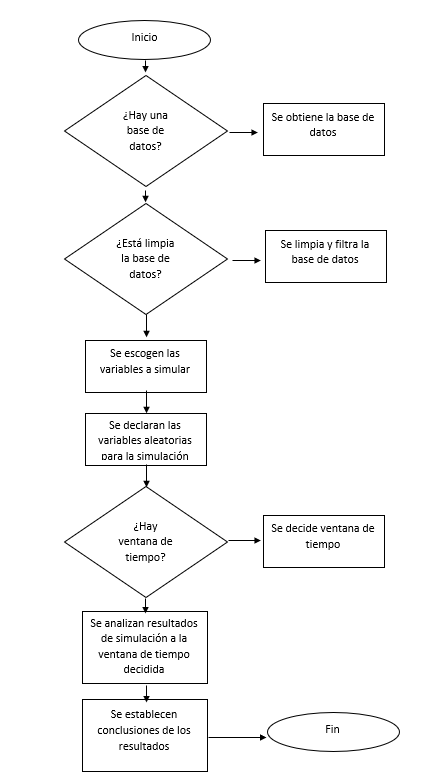

### 1.8 Visualizacion de base de datos

In [2]:
# Librerias a utilizar 
import pandas as pd
import numpy as np 
import random
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import seaborn as sns
from scipy.optimize import fsolve
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

La base de datos a utlizar cuenta con un total de 17 variables que describen datos de los 2242 clientes preferentes que son utilizados como muestra. Para la aplicacion de los procesos se debe de filtrar de la base aquellas variables que sean binarias o cuyo valor sea del tipo alfanumerico. 

In [5]:
data=pd.read_excel("marketing_campaign.xlsx")
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Graduation,Single,58138.0,2012-09-04,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0
1,2174,1954,Graduation,Single,46344.0,2014-03-08,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0
2,4141,1965,Graduation,Together,71613.0,2013-08-21,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0
3,6182,1984,Graduation,Together,26646.0,2014-02-10,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0
4,5324,1981,PhD,Married,58293.0,2014-01-19,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0


In [6]:
def dqr(data):
    
    #%% Lista de variables de la base de datos
    columns = pd.DataFrame(list(data.columns.values),
                           columns= ['Nombres'],
                           index= list(data.columns.values)) 
    
    #%% Lista de tipos de datos
    data_types = pd.DataFrame(data.dtypes, columns=['Data_Types'])
    
    #%% lista de datos perdidos
    missing_values = pd.DataFrame(data.isnull().sum(),
                                  columns=['Missing_values']) 
    
    #%% lista de valores presentes
    present_values = pd.DataFrame(data.count(), 
                                  columns=['Present Values'])
    
    #%% Lista de valores únicos para cada variable
    unique_values = pd.DataFrame(columns=['Unique_Values'])
    for col in list(data.columns.values):
        unique_values.loc[col] = [data[col].nunique()]

    #%% Lista de valores mínimos
    min_values = pd.DataFrame(columns=['Min'])
    for col in list(data.columns.values):
        try:
            min_values.loc[col] = [data[col].min()]
        except:
            pass
    
    #%% Lista de valores máximos
    max_values = pd.DataFrame(columns=['Max'])
    for col in list(data.columns.values):
        try:
            max_values.loc[col] = [data[col].max()]
        except:
            pass
    
    #%% Columna 'Categorica' que sea booleana que cuando sea True represente
    #   que la variable es categorica, y False represente que la variable es
    #  numérica
    return columns.join(data_types).join(missing_values).join(present_values).join(unique_values).join(min_values).join(max_values)

In [7]:
report = dqr(data)
# Mostrar reporte
report.head(60)

,Nombres,Data_Types,Missing_values,Present Values,Unique_Values,Min,Max
ID,ID,int64,0,2240,2240,0,11191
Year_Birth,Year_Birth,int64,0,2240,59,1893,1996
Education,Education,object,0,2240,5,2n,PhD
Marital_Status,Marital_Status,object,203,2037,8,NaN,NaN
Income,Income,float64,224,2016,1800,1730.0,666666.0
Dt_Customer,Dt_Customer,datetime64[ns],203,2037,648,2012-07-30 00:00:00,2014-06-29 00:00:00
Recency,Recency,float64,203,2037,100,0.0,99.0
MntWines,MntWines,float64,203,2037,756,0.0,1493.0
MntFruits,MntFruits,float64,203,2037,158,0.0,199.0
MntMeatProducts,MntMeatProducts,float64,203,2037,539,1.0,1725.0


Tras la limpieza de las variables no fundamentales, el numero de columnas fue reducida a 12, donde se identica la variable "income" como la principal, y el resto se divide en los tipos de compras realizadas y la clasificacion de los productos realizados.

In [8]:
datan=data.drop(['ID','Year_Birth', 'Education', 'Marital_Status','Dt_Customer', 'Recency'],axis=1)
datan.head(5)

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,58138.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0
1,46344.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0
2,71613.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0
3,26646.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0
4,58293.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0


In [9]:
# Cambiar los valores faltantes por ceros 
datan['Income'].fillna(0, inplace = True) 
datan['MntWines'].fillna(0, inplace = True)
datan['MntFruits'].fillna(0, inplace = True)
datan['MntMeatProducts'].fillna(0, inplace = True) 
datan['MntFishProducts'].fillna(0, inplace = True)
datan['MntSweetProducts'].fillna(0, inplace = True)
datan['MntGoldProds'].fillna(0, inplace = True) 
datan['NumDealsPurchases'].fillna(0, inplace = True)
datan['NumWebPurchases'].fillna(0, inplace = True)
datan['NumCatalogPurchases'].fillna(0, inplace = True)
datan['NumStorePurchases'].fillna(0, inplace = True) 
datan['NumWebVisitsMonth'].fillna(0, inplace = True)


In [10]:
report = dqr(datan)
# Mostrar reporte
report.head(60)

,Nombres,Data_Types,Missing_values,Present Values,Unique_Values,Min,Max
Income,Income,float64,0,2240,1801,0.0,666666.0
MntWines,MntWines,float64,0,2240,756,0.0,1493.0
MntFruits,MntFruits,float64,0,2240,158,0.0,199.0
MntMeatProducts,MntMeatProducts,float64,0,2240,540,0.0,1725.0
MntFishProducts,MntFishProducts,float64,0,2240,179,0.0,258.0
MntSweetProducts,MntSweetProducts,float64,0,2240,174,0.0,263.0
MntGoldProds,MntGoldProds,float64,0,2240,209,0.0,362.0
NumDealsPurchases,NumDealsPurchases,float64,0,2240,15,0.0,15.0
NumWebPurchases,NumWebPurchases,float64,0,2240,15,0.0,27.0
NumCatalogPurchases,NumCatalogPurchases,float64,0,2240,14,0.0,28.0


### 1.9 Pruebas de Q-Q

In [11]:
catalogo=datan['NumCatalogPurchases']
web=datan['NumWebPurchases']
store=datan['NumStorePurchases']

In [12]:
dist_to = ['norm', 'chi','crystalball','dgamma','dweibull','fisk','gennorm','rdist','skewnorm','t','vonmises_line', 'dgamma', 'beta']

def distribuciones(datos):
    results = []
    for i in dist_to:
        dist = getattr(st, i)
        param = dist.fit(datos)
        a = st.kstest(datos, i, args=param)
        results.append((i,a[0],a[1]))


    results.sort(key=lambda x:float(x[2]), reverse=True)
    for j in results:
        print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

### Pruebas de distribucion para el nodo 1

In [13]:
# Valor estadistico y pvalue de los datos de compras web tras las distribuiciones de facto de python.
distribuciones(web)

C:\Users\Mateo\anaconda32\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\Mateo\anaconda32\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


beta: statistic=0.08786776635016236, pvalue=1.6957499495029066e-15
dweibull: statistic=0.10746926165524817, pvalue=5.52809227009683e-23
skewnorm: statistic=0.10937437798470873, pvalue=8.591938286856281e-24
dgamma: statistic=0.11240615262234643, pvalue=4.1484601587772395e-25
dgamma: statistic=0.11240615262234643, pvalue=4.1484601587772395e-25
t: statistic=0.12305355742052915, pvalue=5.093553150303768e-30
gennorm: statistic=0.125184216087194, pvalue=4.680544042669467e-31
norm: statistic=0.13629666787202277, pvalue=9.344165052131982e-37
crystalball: statistic=0.1362966824147847, pvalue=9.343997636093047e-37
rdist: statistic=0.1585712298470029, pvalue=1.1476310707116997e-49
chi: statistic=0.20262744913797082, pvalue=4.1744545072444828e-81
fisk: statistic=0.2286635157055386, pvalue=1.9779563393127803e-103
vonmises_line: statistic=0.35333535541588323, pvalue=1.2138515183617933e-250


In [14]:
# Modelo de ajuste de las mejores tres distribuiciones para el nodo 1
md1_N1 = st.beta.fit(web)
md2_N1 = st.dweibull.fit(web)
md3_N1 = st.skewnorm.fit(web)

In [29]:
md3_N1

(5821882.022580404, -4.020780959574802e-06, 4.740899008345069)

**Nodo 1 mediante distribucion Beta**

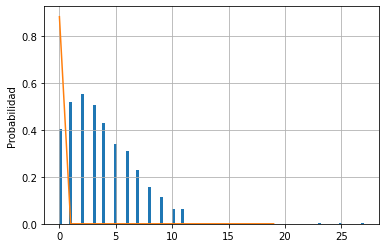

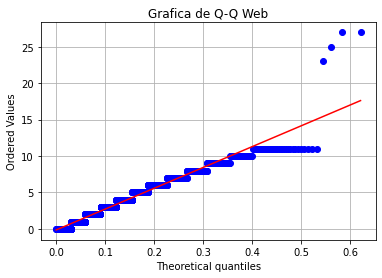

In [28]:
# Histograma de las variables creadas
divisiones = 100 # Cantidad de barras en el histograma
plt.hist(web,divisiones,density=True)
a= md1_N1[0]
b= md1_N1[1]
scale= md1_N1[2]
# Modelado de PDF
x = np.arange(0,20,1)
y = st.beta.pdf(x,a,b,scale)
plt.plot(x,y)
plt.ylabel('Probabilidad')
plt.grid()
plt.show()

# gráfica de Q-Q entre las muestras creadas y una curva normal
grap1 = st.probplot(web,(md1_N1[0],md1_N1[1]),dist='beta',plot=plt)
plt.grid()
plt.title('Grafica de Q-Q Web')
plt.show()

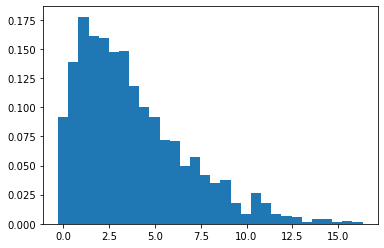

In [23]:
n = 30
n1 = st.beta.rvs(a=md1_N1[0],b=md1_N1[1], loc=md1_N1[2],scale=md1_N1[3],size=1300)
[freq,x,p] = plt.hist(n1,bins=n,density=True)
x = x[:-1]
plt.show()

In [24]:
samp = st.beta.rvs(a=md1_N1[0],b=md1_N1[1], loc=md1_N1[2],scale=md1_N1[3],size=1000) 
paramb = st.beta.fit(samp)
pi = st.beta.pdf(x, a=paramb[0], b=paramb[1], loc=paramb[2], scale=paramb[3])
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi
# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei,obs_i:(obs_i-Ei)**2/Ei,Ei,freq)))
print('Valor de chi cuadrado teorico  = ',x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',X2)

# Cálculo de Grados de libertad del estadístico
p = 4 # Parámetros estimados con los datos
m = n-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)

Valor de chi cuadrado teorico  =  3.1210026303817595
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=3.1210026303817595, pvalue=0.9999999995578794)
Estadístico de chi_cuadrado =  37.65248413348277


Aceptamos H0

**Nodo 1 mediante distribucion Dweibull**

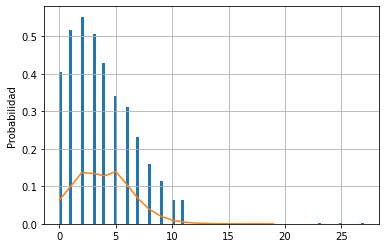

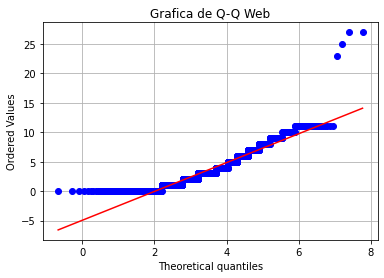

In [30]:
# Histograma de las variables creadas
divisiones = 100 # Cantidad de barras en el histograma
plt.hist(web,divisiones,density=True)
a= md2_N1[0]
b= md2_N1[1]
scale= md2_N1[2]
# Modelado de PDF
x = np.arange(0,20,1)
y = st.dweibull.pdf(x,a,b,scale)
plt.plot(x,y)
plt.ylabel('Probabilidad')
plt.grid()
plt.show()

# gráfica de Q-Q entre las muestras creadas y una curva normal
grap1 = st.probplot(web,(md2_N1[0],md2_N1[1]),dist='dweibull',plot=plt)
plt.grid()
plt.title('Grafica de Q-Q Web')
plt.show()

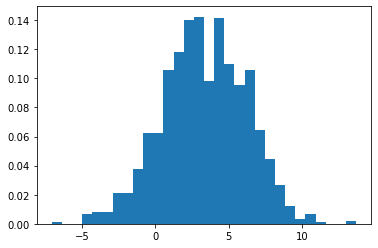

In [27]:
n = 30
n1 = st.dweibull.rvs(md2_N1[0],md2_N1[1],md2_N1[2],size=1300)
[freq,x,p] = plt.hist(n1,bins=n,density=True)
x = x[:-1]
plt.show()

In [28]:
pi = st.dweibull.pdf(x, md2_N1[0],md2_N1[1],md2_N1[2])
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi
# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei,obs_i:(obs_i-Ei)**2/Ei,Ei,freq)))
print('Valor de chi cuadrado teorico  = ',x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',X2)

# Cálculo de Grados de libertad del estadístico
p = 4 # Parámetros estimados con los datos
m = n-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)

Valor de chi cuadrado teorico  =  2.2500006491758895
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=2.2500006491758895, pvalue=0.9999999999942342)
Estadístico de chi_cuadrado =  37.65248413348277


Aceptamos H0

**Nodo 1 mediante distribucion Skewnorm**

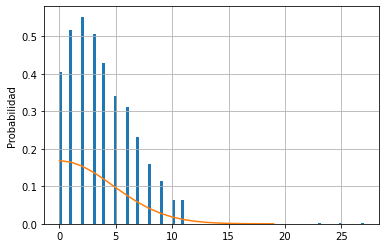

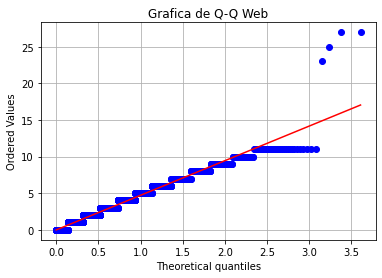

In [31]:
# Histograma de las variables creadas
divisiones = 100 # Cantidad de barras en el histograma
plt.hist(web,divisiones,density=True)
a= md3_N1[0]
b= md3_N1[1]
scale= md3_N1[2]
# Modelado de PDF
x = np.arange(0,20,1)
y = st.skewnorm.pdf(x,a,b,scale)
plt.plot(x,y)
plt.ylabel('Probabilidad')
plt.grid()
plt.show()

# gráfica de Q-Q entre las muestras creadas y una curva normal
grap1 = st.probplot(web,(md3_N1[0],md3_N1[1]),dist='skewnorm',plot=plt)
plt.grid()
plt.title('Grafica de Q-Q Web')
plt.show()

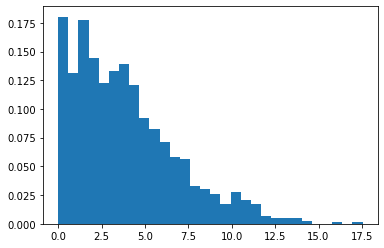

In [31]:
n = 30
n1 = st.skewnorm.rvs(md3_N1[0],md3_N1[1],md3_N1[2],size=1300)
[freq,x,p] = plt.hist(n1,bins=n,density=True)
x = x[:-1]
plt.show()

In [32]:
pi = st.skewnorm.pdf(x, md3_N1[0],md3_N1[1],md3_N1[2])
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi
# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei,obs_i:(obs_i-Ei)**2/Ei,Ei,freq)))
print('Valor de chi cuadrado teorico  = ',x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',X2)

# Cálculo de Grados de libertad del estadístico
p = 4 # Parámetros estimados con los datos
m = n-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)

Valor de chi cuadrado teorico  =  270.183206181259
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=270.183206181259, pvalue=5.967781620946025e-41)
Estadístico de chi_cuadrado =  37.65248413348277


Aceptamos H0

### Pruebas de distribucion para el nodo 2

In [21]:
# Valor estadistico y pvalue de los datos de compras por catologo tras las distribuiciones de facto de python.
distribuciones(catalogo)

dgamma: statistic=0.2061405254514631, pvalue=5.917661955217989e-84
dgamma: statistic=0.2061405254514631, pvalue=5.917661955217989e-84
dweibull: statistic=0.21030698165654177, pvalue=2.1278240451671563e-87
rdist: statistic=0.2121030029523771, pvalue=6.623996626092952e-89
crystalball: statistic=0.2122864819281597, pvalue=4.6391085217988796e-89
norm: statistic=0.21228650258556048, pvalue=4.638922408980374e-89
t: statistic=0.21918895709821898, pvalue=5.569180550907097e-95
gennorm: statistic=0.2524548167441487, pvalue=2.6195005228401114e-126
skewnorm: statistic=0.3232141855289099, pvalue=9.277081882924543e-209
fisk: statistic=0.32321428571428573, pvalue=9.274253755724466e-209
chi: statistic=0.34259407389757296, pvalue=3.151147338316966e-235
vonmises_line: statistic=0.46391867126259667, pvalue=0.0
beta: statistic=0.5639329884694586, pvalue=0.0


In [34]:
# Modelo de ajuste de las mejores tres distribuiciones para el nodo 1
md1_N2 = st.dgamma.fit(catalogo)
md2_N2 = st.dweibull.fit(catalogo)
md3_N2 = st.rdist.fit(catalogo)

In [38]:
md3_N2

(31995.903803884707, 2.451301898009559, 520.2065168878637)

**Nodo 2 mediante distribucion Dgamma**

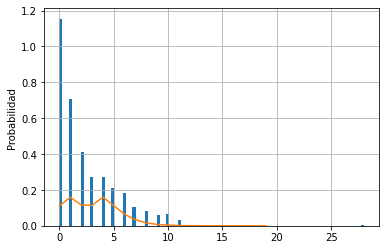

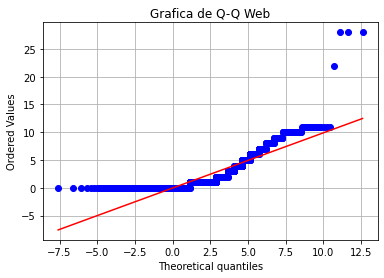

In [37]:
# Histograma de las variables creadas
divisiones = 100 # Cantidad de barras en el histograma
plt.hist(catalogo,divisiones,density=True)
a= md1_N2[0]
b= md1_N2[1]
scale= md1_N2[2]
# Modelado de PDF
x = np.arange(0,20,1)
y = st.dgamma.pdf(x,a,b,scale)
plt.plot(x,y)
plt.ylabel('Probabilidad')
plt.grid()
plt.show()

# gráfica de Q-Q entre las muestras creadas y una curva normal
grap1 = st.probplot(catalogo,(md1_N2[0],md1_N2[1]),dist='dgamma',plot=plt)
plt.grid()
plt.title('Grafica de Q-Q Web')
plt.show()

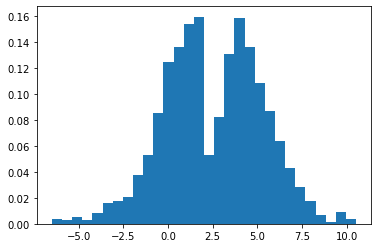

In [39]:
n = 30
n1 = st.dgamma.rvs(md1_N2[0],md1_N2[1],md1_N2[2],size=1300)
[freq,x,p] = plt.hist(n1,bins=n,density=True)
x = x[:-1]
plt.show()

In [40]:
pi = st.dgamma.pdf(x,md1_N2[0],md1_N2[1],md1_N2[2])
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi
# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei,obs_i:(obs_i-Ei)**2/Ei,Ei,freq)))
print('Valor de chi cuadrado teorico  = ',x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',X2)

# Cálculo de Grados de libertad del estadístico
p = 4 # Parámetros estimados con los datos
m = n-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)

Valor de chi cuadrado teorico  =  1.065526977585965
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=1.065526977585965, pvalue=0.9999999999999998)
Estadístico de chi_cuadrado =  37.65248413348277


Aceptamos H0

**Nodo 2 mediante distribucion Dweibull**

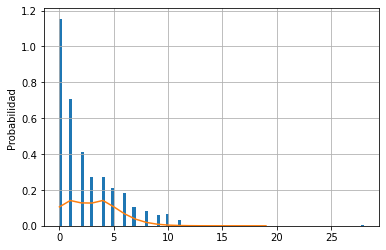

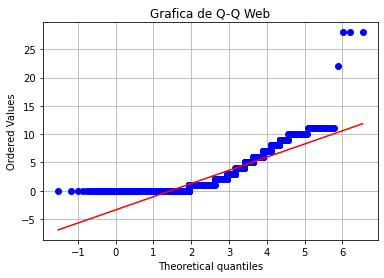

In [43]:
# Histograma de las variables creadas
divisiones = 100 # Cantidad de barras en el histograma
plt.hist(catalogo,divisiones,density=True)
a= md2_N2[0]
b= md2_N2[1]
scale= md2_N2[2]
# Modelado de PDF
x = np.arange(0,20,1)
y = st.dweibull.pdf(x,a,b,scale)
plt.plot(x,y)
plt.ylabel('Probabilidad')
plt.grid()
plt.show()

# gráfica de Q-Q entre las muestras creadas y una curva normal
grap1 = st.probplot(catalogo,(md2_N2[0],md2_N2[1]),dist='dweibull',plot=plt)
plt.grid()
plt.title('Grafica de Q-Q Web')
plt.show()

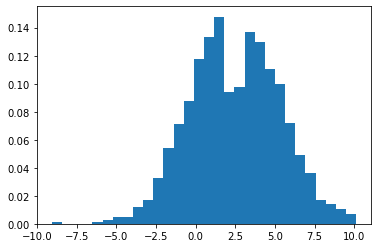

In [45]:
n = 30
n1 = st.dweibull.rvs(md2_N2[0],md2_N2[1],md2_N2[2],size=1300)
[freq,x,p] = plt.hist(n1,bins=n,density=True)
x = x[:-1]
plt.show()

In [49]:
pi = st.dweibull.pdf(x, md2_N2[0],md2_N2[1],md2_N2[2])
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi
# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei,obs_i:(obs_i-Ei)**2/Ei,Ei,freq)))
print('Valor de chi cuadrado teorico  = ',x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',X2)

# Cálculo de Grados de libertad del estadístico
p = 4 # Parámetros estimados con los datos
m = n-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)

Valor de chi cuadrado teorico  =  -0.12088001313548924
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=-0.12088001313548924, pvalue=1.0)
Estadístico de chi_cuadrado =  37.65248413348277


Rechazamos H0

**Nodo 2 mediante distribucion Rdist**

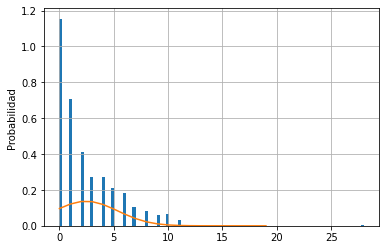

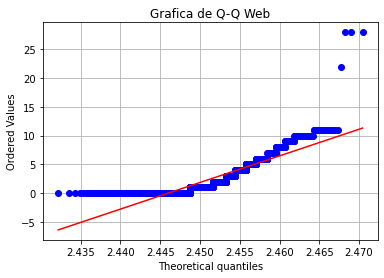

In [39]:
# Histograma de las variables creadas
divisiones = 100 # Cantidad de barras en el histograma
plt.hist(catalogo,divisiones,density=True)
a= md3_N2[0]
b= md3_N2[1]
scale= md3_N2[2]
# Modelado de PDF
x = np.arange(0,20,1)
y = st.rdist.pdf(x,a,b,scale)
plt.plot(x,y)
plt.ylabel('Probabilidad')
plt.grid()
plt.show()

# gráfica de Q-Q entre las muestras creadas y una curva normal
grap1 = st.probplot(catalogo,(md3_N2[0],md3_N2[1]),dist='rdist',plot=plt)
plt.grid()
plt.title('Grafica de Q-Q Web')
plt.show()

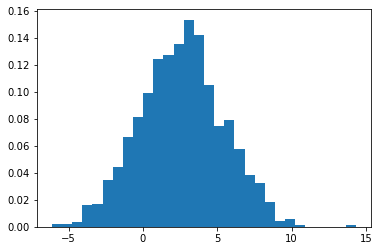

In [50]:
n = 30
n1 = st.rdist.rvs(md3_N2[0],md3_N2[1],md3_N2[2],size=1300)
[freq,x,p] = plt.hist(n1,bins=n,density=True)
x = x[:-1]
plt.show()

In [52]:
pi = st.rdist.pdf(x, md3_N2[0],md3_N2[1],md3_N2[2])
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi
# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei,obs_i:(obs_i-Ei)**2/Ei,Ei,freq)))
print('Valor de chi cuadrado teorico  = ',x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',X2)

# Cálculo de Grados de libertad del estadístico
p = 4 # Parámetros estimados con los datos
m = n-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)

Valor de chi cuadrado teorico  =  9.32408898625145
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=9.32408898625145, pvalue=0.9998023739565176)
Estadístico de chi_cuadrado =  37.65248413348277


Aceptamos H0

### Pruebas de distribucion para el nodo 3

In [22]:
# Valor estadistico y pvalue de los datos de compras en tienda tras las distribuiciones de facto de python.
distribuciones(store)

skewnorm: statistic=0.0995024918075195, pvalue=9.293211354264945e-20
vonmises_line: statistic=0.12266906632246932, pvalue=7.801604825927434e-30
dweibull: statistic=0.13013642903329029, pvalue=1.5522329452973467e-33
dgamma: statistic=0.1317928153607457, pvalue=2.187272454786598e-34
dgamma: statistic=0.1317928153607457, pvalue=2.187272454786598e-34
t: statistic=0.15671131741542904, pvalue=1.636869012648507e-48
crystalball: statistic=0.15671786595628961, pvalue=1.6217148618112975e-48
norm: statistic=0.15671790382454387, pvalue=1.6216276372658322e-48
beta: statistic=0.2349200583365468, pvalue=3.242182312885121e-109
fisk: statistic=0.37971212380410446, pvalue=8.575254857228037e-291
chi: statistic=0.41674717082379475, pvalue=0.0
gennorm: statistic=0.46562499999999996, pvalue=0.0
rdist: statistic=0.5136752532492255, pvalue=0.0


In [53]:
md1_N3 = st.skewnorm.fit(store)
md2_N3 = st.vonmises_line.fit(store)
md3_N3 = st.dweibull.fit(store)

In [56]:
md3_N3

(1.3257610067378702, 4.6743725005219865, 3.1041961350792047)

**Nodo 3 mediante distribucion Skewnorm**

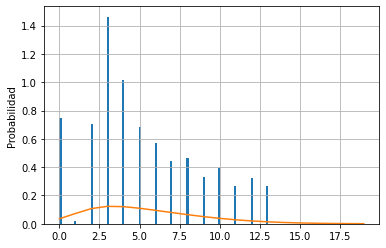

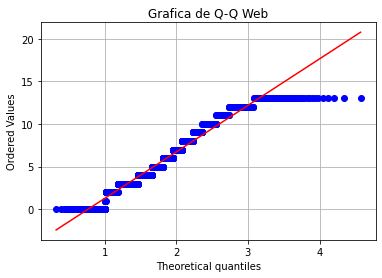

In [40]:
# Histograma de las variables creadas
divisiones = 100 # Cantidad de barras en el histograma
plt.hist(store,divisiones,density=True)
a= md1_N3[0]
b= md1_N3[1]
scale= md1_N3[2]
# Modelado de PDF
x = np.arange(0,20,1)
y = st.skewnorm.pdf(x,a,b,scale)
plt.plot(x,y)
plt.ylabel('Probabilidad')
plt.grid()
plt.show()

# gráfica de Q-Q entre las muestras creadas y una curva normal
grap1 = st.probplot(store,(md1_N3[0],md1_N3[1]),dist='skewnorm',plot=plt)
plt.grid()
plt.title('Grafica de Q-Q Web')
plt.show()

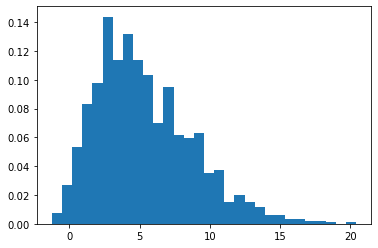

In [57]:
n = 30
n1 = st.skewnorm.rvs(md1_N3[0],md1_N3[1],md1_N3[2],size=1300)
[freq,x,p] = plt.hist(n1,bins=n,density=True)
x = x[:-1]
plt.show()

In [68]:
pi = st.skewnorm.pdf(x, md1_N3[0],md1_N3[1],md1_N3[2])
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi
# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei,obs_i:(obs_i-Ei)**2/Ei,Ei,freq)))
print('Valor de chi cuadrado teorico  = ',x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',X2)

# Cálculo de Grados de libertad del estadístico
p = 4 # Parámetros estimados con los datos
m = n-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)

Valor de chi cuadrado teorico  =  -37.812727647264346
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=-37.812727647264346, pvalue=1.0)
Estadístico de chi_cuadrado =  37.65248413348277


Rechazamos H0

**Nodo 3 mediante distribucion Vonmises Line**

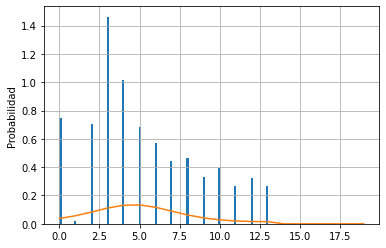

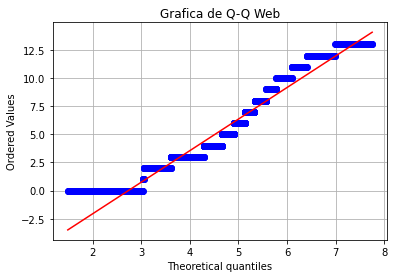

In [41]:
# Histograma de las variables creadas
divisiones = 100 # Cantidad de barras en el histograma
plt.hist(store,divisiones,density=True)
a= md2_N3[0]
b= md2_N3[1]
scale= md2_N3[2]
# Modelado de PDF
x = np.arange(0,20,1)
y = st.vonmises_line.pdf(x,a,b,scale)
plt.plot(x,y)
plt.ylabel('Probabilidad')
plt.grid()
plt.show()

# gráfica de Q-Q entre las muestras creadas y una curva normal
grap1 = st.probplot(store,(md2_N3[0],md2_N3[1]),dist='vonmises_line',plot=plt)
plt.grid()
plt.title('Grafica de Q-Q Web')
plt.show()

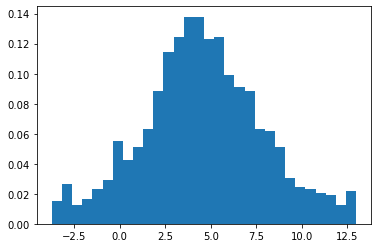

In [60]:
n = 30
n1 = st.vonmises_line.rvs(md2_N3[0],md2_N3[1],md2_N3[2],size=1300)
[freq,x,p] = plt.hist(n1,bins=n,density=True)
x = x[:-1]
plt.show()

In [62]:
pi = st.vonmises_line.pdf(x, md2_N3[0],md2_N3[1],md2_N3[2])
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi
# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei,obs_i:(obs_i-Ei)**2/Ei,Ei,freq)))
print('Valor de chi cuadrado teorico  = ',x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',X2)

# Cálculo de Grados de libertad del estadístico
p = 4 # Parámetros estimados con los datos
m = n-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)

Valor de chi cuadrado teorico  =  5.002746909054844
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=5.002746909054844, pvalue=0.9999998270483865)
Estadístico de chi_cuadrado =  37.65248413348277


Aceptamos H0

**Nodo 3 mediante distribucion Dweibull**

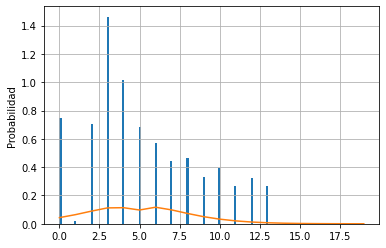

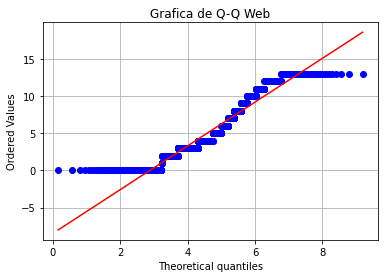

In [42]:
# Histograma de las variables creadas
divisiones = 100 # Cantidad de barras en el histograma
plt.hist(store,divisiones,density=True)
a= md3_N3[0]
b= md3_N3[1]
scale= md3_N3[2]
# Modelado de PDF
x = np.arange(0,20,1)
y = st.dweibull.pdf(x,a,b,scale)
plt.plot(x,y)
plt.ylabel('Probabilidad')
plt.grid()
plt.show()

# gráfica de Q-Q entre las muestras creadas y una curva normal
grap1 = st.probplot(store,(md3_N3[0],md3_N3[1]),dist='dweibull',plot=plt)
plt.grid()
plt.title('Grafica de Q-Q Web')
plt.show()

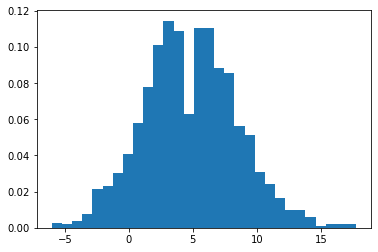

In [63]:
n = 30
n1 = st.dweibull.rvs(md3_N3[0],md3_N3[1],md3_N3[2],size=1300)
[freq,x,p] = plt.hist(n1,bins=n,density=True)
x = x[:-1]
plt.show()

In [64]:
pi = st.dweibull.pdf(x, md3_N3[0],md3_N3[1],md3_N3[2])
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi
# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei,obs_i:(obs_i-Ei)**2/Ei,Ei,freq)))
print('Valor de chi cuadrado teorico  = ',x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',X2)

# Cálculo de Grados de libertad del estadístico
p = 4 # Parámetros estimados con los datos
m = n-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)

Valor de chi cuadrado teorico  =  3.807702659071733
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=3.807702659071733, pvalue=0.9999999942531745)
Estadístico de chi_cuadrado =  37.65248413348277


Aceptamos H0

### 2.0 Simulacion de variables aleatorias

#### 2.1 Declaracion de las ditribuiciones por tipo de compra

El primer paso a realizar para simular los escenarios adecuados es la declaracion de variables aleatorias por cada nodo definido. Como ya fue establecido, los nodos definidos son las compras por web (NWP), las compras por catalogo (NCP) y las compras en tienda (NSP). 

In [8]:
def dist_NWP(Q):
    """
    Esta funcion simula las posibles compras por web a partir de la distribicion correspondiente 
    presentada en el apartado de supuestos
    ---------
    Parametros: N -> Numero de simulaciones
    """
    p = [0.7429,0.2379,0.0192]
    w = []
    for i in range(Q):
        z=[random.randint(0,6),random.randint(6,11),random.randint(11,20)]
        w.append(random.choices(z,p)) #Cambiar de formato
    return w

def dist_NCP(Q):
    """
    Esta funcion simula las posibles compras por catalogo a partir de la distribicion correspondiente 
    presentada en el apartado de supuestos
    ---------
    Parametros: N -> Numero de simulaciones
    """
    p = [0.8487,0.1411,0.0103]
    w = []
    for i in range(Q):
        z=[random.randint(0,6),random.randint(6,11),random.randint(11,20)]
        w.append(random.choices(z,p)) #Cambiar de formato
    return w

def dist_NSP(Q):
    """
    Esta funcion simula las posibles compras en tienda a partir de la distribicion correspondiente 
    presentada en el apartado de supuestos
    ---------
    Parametros: N -> Numero de simulaciones
    """
    p = [0.675,0.3205,0.0045]
    w = []
    for i in range(Q):
        z=[random.randint(0,6),random.randint(6,11),random.randint(11,20)]
        w.append(random.choices(z,p)) #Cambiar de formato
    return w 

Q = 2240 #Este es el numero de clientes preferentes de la empresa

Cada una de las funciones anteriores simulara una lista de datos, donde cada dato representa el numero de compras por cada metodo de compra que realizo el cliente. Cada tipo de compras tiene una distribuicion de probabilidad diferente segun el total de compras por metodo de compra que realice. 

#### 2.2 Visualizacion de la distribuicion de cada metodo de compra por cliente

**Compras por vía web**

Text(0.5, 1.0, 'Distribucion de compras por web')

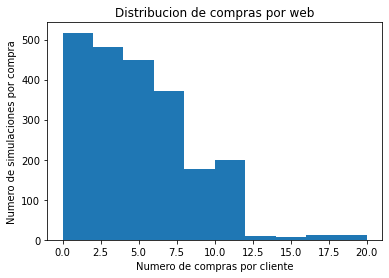

In [9]:
# Vista distribuicion de compras por web
cw = dist_NWP(Q)
plt.hist(np.array(cw))
plt.xlabel("Numero de compras por cliente")
plt.ylabel("Numero de simulaciones por compra")
plt.title("Distribucion de compras por web")

**Compras por catalogo**

Text(0.5, 1.0, 'Distribucion de compras por catalogo')

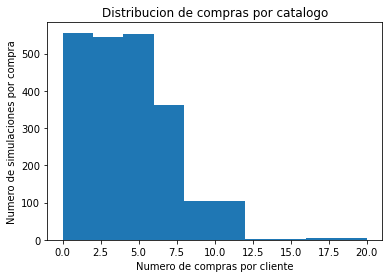

In [10]:
# Vista distribuicion de compras por catalogo
cc = dist_NCP(Q)
plt.hist(np.array(cc))
plt.xlabel("Numero de compras por cliente")
plt.ylabel("Numero de simulaciones por compra")
plt.title("Distribucion de compras por catalogo")

**Compras en presenciales en tienda**

Text(0.5, 1.0, 'Distribucion de compras en tienda')

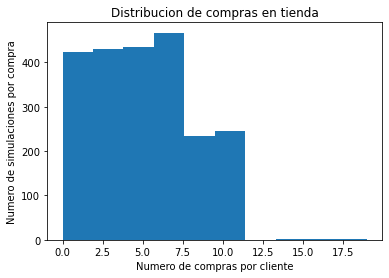

In [11]:
# Vista distribuicion de compras en tienda
cs = dist_NSP(Q)
plt.hist(np.array(cs))
plt.xlabel("Numero de compras por cliente")
plt.ylabel("Numero de simulaciones por compra")
plt.title("Distribucion de compras en tienda")

Con la primera visualizacion de los datos, se puede dar conclusiones parciales de que la concentracion de las compras se encontraran en los numeros menores. Ademas que entre los clientes que tienden a comprar en linea, su numero de compras suele ser mayores a aquellos que compran de manera presencial. En esta parte puede deberse a factores no netos como la comodidad, falta de tiempo o costo de traslado.

#### 2.3 Simulacion de 10,000 situaciones.

Ahora, el objetivo de este proyecto es promover si el numero de compras incrementaran en los proximos meses, y a su vez en que porcentaje se incrementarian los ingresos totales. Para lograr este hecho se simularan con las distribuciones anteriores multiples situaciones, donde se hara el conteo final de la lista del numero de compras y se obtendran metricas estadisticas basicas para comparar los resultados de las simulaciones con los numeros registrados.

In [12]:
# Funcion de retorno de compras totales
def suma_compras():
    """
    Funcion de sumatoria hacia todos los tipos de compras: totales y por tipo.
    """
    cw = dist_NWP(Q)
    cc = dist_NCP(Q)
    cs = dist_NSP(Q)
    
    N_cw = np.sum(cw) #Este es el numero de compras totales por web
    N_cc = np.sum(cc) #Este es el numero de compras totales por catalogo
    N_cs = np.sum(cs) #Este es el numero de compras totales en tienda
    
    Compras_totales = N_cw + N_cc + N_cs
    
    return Compras_totales,N_cw,N_cc,N_cs

# Simulacion de N simulaciones de compras para el proximo mes
N = 10000
simu_compras = [suma_compras() for i in range(0,N)]

En la variable, "simu_compras" se almacenan los resultados del conteo de todas las compras agrupadas por tipo de compra. Con los datos almacenados en esta variable se puede crear una funcion que nos mencione si el numero de compras aumnento o disminuyo conforme al registro oficial, incluso que nos diga la probabilidad de que el objetivo de aumentar el numero de compras se consiga.

In [13]:
# Probabilidad hacia el incremento en las ventas
def prob_h(N):
    """
    Esta funcion describe la probabilidad de que las compras simuladas sean superiores al mes 0.
    ------
    Parametros: N -> Numero de simulaciones requeridas, debe ser el mismo numero que en la lista de simulacion
    """
    c = 0
    for i in range(0,N):
        if simu_compras[i][0] > 25737:
            c +=1
        else:
            c +=0
    return c

print("La probabilidad de que las compras incrementen el proximo mes es de",prob_h(N)/N*100,"%")

La probabilidad de que las compras incrementen el proximo mes es de 100.0 %


#### 2.4 Definicion de metricas de las simulaciones y sus distribuiciones

Se tiene que considerar que cada simulacion tiene una distribucion de datos por metodo de compra diferentes a lo que se propuso en el planteamiento inicial. Esta distribuicion es importante porque define que parte de los ingresos totales corresponde a cada tipo de compra, y saber identificar que metodo de compra debe de disponer de mayor tiempo de atencion por los miembros de la empresa. 

Para esto se calcula la distribucion de cada simulacion y obtener la distribuicion media que sera utlizada para los proximos procesos.

In [15]:
# Tabla de datos y distribuicion de probabilidades
data_b1 = pd.DataFrame(simu_compras)
data_b1.columns = ["Compras totales","NWP","NCP","NSP"]
data_b1["W_NWP"] = round(data_b1["NWP"]/data_b1["Compras totales"],4)
data_b1["W_NCP"] = round(data_b1["NCP"]/data_b1["Compras totales"],4)
data_b1["W_NSP"] = round(data_b1["NSP"]/data_b1["Compras totales"],4)
data_b1.head()

,Compras totales,NWP,NCP,NSP,W_NWP,W_NCP,W_NSP
0,29583,10158,8809,10616,0.3434,0.2978,0.3589
1,30214,10510,8901,10803,0.3479,0.2946,0.3575
2,29749,10379,8557,10813,0.3489,0.2876,0.3635
3,29159,9744,8865,10550,0.3342,0.3040,0.3618
4,29938,10187,8847,10904,0.3403,0.2955,0.3642


In [16]:
# Distribuiciones medias de las varianzas
pm_nwp = data_b1["W_NWP"].mean()
pm_ncp = data_b1["W_NCP"].mean()
pm_nsp = data_b1["W_NSP"].mean()
round(pm_nwp,3),round(pm_ncp,3),round(pm_nsp,3)

(0.343, 0.294, 0.363)

La distribuicion media obtenida de las simulaciones son 34.2% de compras web, 29.5% de compras por catalogo y 36.3% de compras en tienda. Mientras que las establecidas en el planteamiento eran 31.6%, 21.3% y 46.1% respectivamente. con estos resultado se puede concluir que respecto al plateamiento inicial, en las simulaciones las compras en tienda han perdido una gran ponderacion, que se ha pasado a los metodos no presenciales. Todo este proceso se realizo en cuanto a las medidas de distribuicion reales. Los siguientes pasos sera

### Separación de datos por nodo

In [137]:
#Nodo 1
N_1=np.isfinite(data.NumWebPurchases)

#Nodo 2
N_2=np.isfinite(data.NumCatalogPurchases)
#Nodo 3
N_3=np.isfinite(data.NumStorePurchases)
#Nodo 4
N_4=np.isfinite(data.Income)

In [18]:
def plot_histogram_discrete(distribucion:'distribución a graficar histograma',
                            xlabel:'x label',
                            ylabel: 'y label',
                            title: 'title'):
    '''Función para graficar el histograma de una distribución discreta'''
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion))) 
    plt.bar(list(set(distribucion)),y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [19]:
def kde_statsmodels_m(x, x_grid, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  #bandwidth * np.ones_like(x),
                          var_type='u', **kwargs)
    return kde.pdf(x_grid)

def kde_statsmodels_func(x, bandwidth=0.2):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  #bandwidth * np.ones_like(x),
                          var_type='u')
    return lambda u: kde.pdf(u)

In [20]:
def Gen_distr_discreta(U:'vector de números aleatorios',
                       p_acum: 'P.Acumulada de la distribución a generar'):
    '''Función que aplica el método de la transformada inversa para calcular números que distribuyan como una distribución
    discreta dada'''
    v = np.array(list(map(lambda j:sum(1 for i in p_acum if i<U[j]),range(N))))
    return v

In [157]:
def estra_igualmente_espaciado(B:'Número de estratos'):
    """
    Esta función aplica el método de estratficacación con un número de estratos dados a valores aleatorios que se encuentran
    entre 0 y 1
    """
    U= np.random.rand(B)
    i= np.arange(0,B)
    estratos= (U+i)/B
    return estratos

In [22]:
def acep_rechazo_simplificada_dis(
    N:'Cantidad de variables a generar',
    Dom_f:'Dominio de la función f como tupla (a,b)',
    f:'función objetivo a generar',
    max_f:'máximo valor de f'):
    
    X = np.zeros(N)
    i=0
    while i<N:
        R2=np.random.uniform(0,max_f)
        R1=np.random.randint(Dom_f[0], Dom_f[1])
        if R2<= f([R1]):
            X[i]=R1
            i+=1
    return X

## Nodo 1

In [23]:
#histograma para el nodo 1
#plot_histogram_discrete(, '', 'Frecuencia', 'Histograma de compras web')

In [131]:
#creación de dataframe que contiene los valores únicos sus frecuencias y su probabilidad asociada a cada valor.
N_1_frec_prob=pd.DataFrame({'Valores': np.unique(cw, return_counts=True)[0],
                            'Frecuencias':np.unique(cw, return_counts=True)[1]}) 
N_1_frec_prob['Probabilidad']=N_1_frec_prob['Frecuencias']/len(N_1)

N_1_frec_prob.head()

,Valores,Frecuencias,Probabilidad
0,0,262,0.116964
1,1,255,0.113839
2,2,234,0.104464
3,3,248,0.110714
4,4,220,0.098214


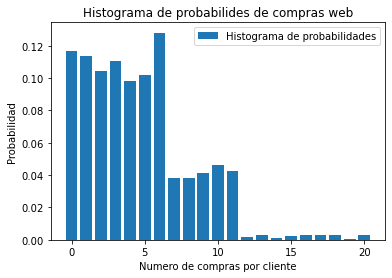

In [26]:
plt.bar(N_1_frec_prob.Valores, N_1_frec_prob.Probabilidad, label='Histograma de probabilidades')
plt.xlabel("Numero de compras por cliente")
plt.ylabel('Probabilidad')
plt.title('Histograma de probabilides de compras web')
plt.legend()
plt.show()

## Kernel density estimation

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernel_density.py:158: RuntimeWarning: invalid value encountered in log
  L += func(f_i)


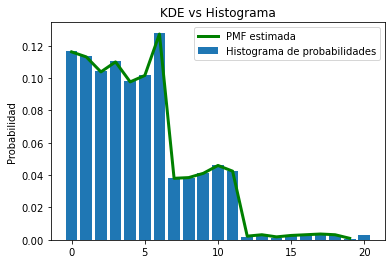

In [27]:
#definimos el grid sobre el que vamos a trabajar
N_1_grid=np.arange(0,20)

#aplicamos nuestra función 
pmf_N1=kde_statsmodels_m(cw, N_1_grid, bandwidth=0.2)

#gráfica
plt.bar(N_1_frec_prob.Valores, N_1_frec_prob.Probabilidad, label='Histograma de probabilidades')
plt.plot(N_1_grid, pmf_N1, label='PMF estimada', color='g', linewidth=3)
plt.xlabel('')
plt.ylabel('Probabilidad')
plt.title('KDE vs Histograma')
plt.legend()
plt.show()

In [28]:

media_N1= np.sum([N_1_frec_prob.Valores[i]*N_1_frec_prob.Probabilidad[i] 
               for i in range(len(N_1_frec_prob.Frecuencias))])

sigma_N1=np.sqrt(np.sum([N_1_frec_prob.Probabilidad[i]*(N_1_frec_prob.Valores[i] - media_N1)**2
               for i in range(len(N_1_frec_prob.Frecuencias))]))

print('Media por medio de definición de distibuciones discretas: ', media_N1)
print('Desviación estándar por medio de definición de distribuciones discretas: ', sigma_N1)

Media por medio de definición de distibuciones discretas:  4.511160714285714
Desviación estándar por medio de definición de distribuciones discretas:  3.529070660127241


In [133]:
#Se añade la probabilidad acumulada
N_1_frec_prob['Acumulada']=N_1_frec_prob.Probabilidad.cumsum()
N_1_frec_prob.head()

,Valores,Frecuencias,Probabilidad,Acumulada
0,0,262,0.116964,0.116964
1,1,255,0.113839,0.230804
2,2,234,0.104464,0.335268
3,3,248,0.110714,0.445982
4,4,220,0.098214,0.544196


## Método de aceptación y rechazo usando KDE

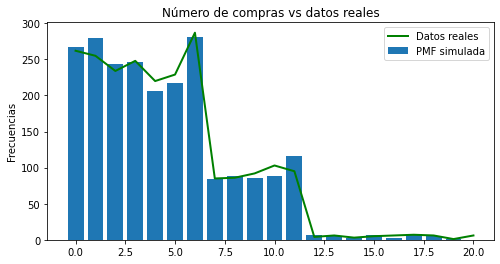

In [48]:
f_kde_n1=kde_statsmodels_func(cw)
pmf_kde_N1=acep_rechazo_simplificada_dis(len(cw), (min(cw),max(cw)), f_kde_n1, max(pmf_N1))

#gráfica
plt.figure(figsize=[8,4])
y,x = np.histogram(pmf_kde_N1,bins = len(set(pmf_kde_N1))) 
plt.bar(list(set(pmf_kde_N1)),y, label='PMF simulada')
plt.plot(N_1_frec_prob.Valores, N_1_frec_prob.Frecuencias, color='g', lw=2, label='Datos reales')
plt.legend()
plt.xlabel('')
plt.ylabel('Frecuencias')
plt.title('Número de compras vs datos reales')
plt.show()

## Método de la transformada inversa para generar números pseudoaleatorios

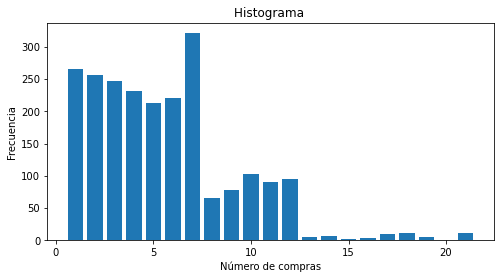

In [49]:
N = len(N_1)
N_1_u = np.random.rand(N) #generamos valores aleatorios
v_N1 = Gen_distr_discreta(N_1_u, N_1_frec_prob.Acumulada)+1 #aplicamos función de trasnformada inversa

plot_histogram_discrete(v_N1, 'Número de compras', 'Frecuencia', 'Histograma ') #graficamos

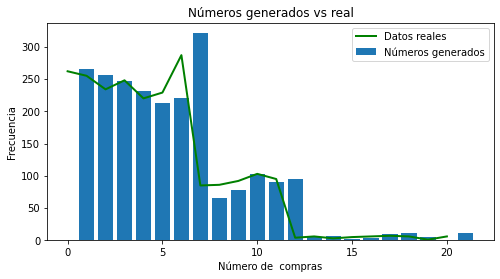

In [50]:
plt.figure(figsize=[8,4])
y,x = np.histogram(v_N1,bins = len(set(v_N1))) 
plt.bar(list(set(v_N1)),y, label= 'Números generados')
plt.plot(N_1_frec_prob.Valores, N_1_frec_prob.Frecuencias, color='g', lw=2, label='Datos reales')
plt.legend()
plt.xlabel('Número de  compras')
plt.ylabel('Frecuencia')
plt.title('Números generados vs real')
plt.show()

In [125]:
# Resumen simulaciones montecarlo
Real_N1 = np.mean(cw)
MTI_N1 = v_N1.mean()
MAR_N1 = pmf_kde_N1.mean()
Resulados_N1 = [Real_N1,MTI_N1,MAR_N1]
df_N1 = pd.DataFrame(Resulados_N1)
df_N1 = df_N1.T
df_N1 = df_N1.rename(columns={0:'Real',1:'MTI',2:'MAR'},
            index = {0:'Resultados N1'})
df_N1

,Real,MTI,MAR
Resultados N1,4.511161,5.540179,4.4125


Como el metodo de aceptacion y rechazo fue más cercano al valor real que el metodo de la transformada inversa, entonces sera ese el metodo al cual se le aplicara la reduccion de la varianza.

## Método de reducción de varianza: estratificación uniforme

**Reduccion de varianza para MTI**

In [78]:
f_u1= lambda U: Gen_distr_discreta(U, N_1_frec_prob.Acumulada)+1
U= estra_igualmente_espaciado(N)
valores_estrat_N1= f_u1(U)
media_estrat_N1=np.mean(valores_estrat_N1)
sigma_estrat_N1=np.std(valores_estrat_N1)

print('Media con reducción de varianza estratificada=', media_estrat_N1)
print('La desviación estándar con el método de estratificación es: ', sigma_estrat_N1)

Media con reducción de varianza estratificada= 5.511160714285714
La desviación estándar con el método de estratificación es:  3.529070660127241


**Reduccion de varianza para MAR**

## Método de reducción de varianza: estratificación de rango

**Reduccion de varianza para MTI**

In [134]:
N_1_frec_prob

,Valores,Frecuencias,Probabilidad,Acumulada
0,0,262,0.116964,0.116964
1,1,255,0.113839,0.230804
2,2,234,0.104464,0.335268
3,3,248,0.110714,0.445982
4,4,220,0.098214,0.544196
5,5,229,0.102232,0.646429
6,6,287,0.128125,0.774554
7,7,85,0.037946,0.812500
8,8,86,0.038393,0.850893
9,9,92,0.041071,0.891964


## Método de reducción de varianza: números complementarios

**Reduccion de varianza para MTI**

In [160]:
ri = np.random.rand(N)
ri_c = 1-ri 
U1= f_u1(ri)
U2= f_u1(ri_c)

m4 = (U1.mean()+U2.mean())/2

print('Media por medio del método de números complementarios: ', m4)

Media por medio del método de números complementarios:  5.516741071428571


In [161]:
df_N1['RV_EstU'] = media_estrat_N1
df_N1['RV_Comp'] = m4
df_N1

,Real,MTI,MAR,RV_EstU,RV_Comp
Resultados N1,4.511161,5.540179,4.4125,5.511161,5.516741


## Nodo 2


In [88]:
## Histograma de nodo 2

## Tabla de valores, frecuencias y probabilidad

In [139]:
N_2_frec_prob=pd.DataFrame({'Valores': np.unique(cc, return_counts=True)[0],
                            'Frecuencias':np.unique(cc, return_counts=True)[1]})
N_2_frec_prob['Probabilidad']=N_2_frec_prob['Frecuencias']/len(N_2)

N_2_frec_prob.head()

,Valores,Frecuencias,Probabilidad
0,0,286,0.127679
1,1,270,0.120536
2,2,283,0.126339
3,3,262,0.116964
4,4,263,0.117411


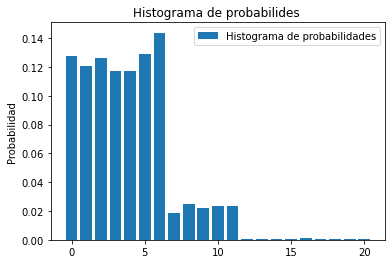

In [140]:
plt.bar(N_2_frec_prob.Valores, N_2_frec_prob.Probabilidad, label='Histograma de probabilidades')
plt.xlabel('')
plt.ylabel('Probabilidad')
plt.title('Histograma de probabilides ')
plt.legend()
plt.show()
plt.show()

## Kernel density estimation

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernel_density.py:158: RuntimeWarning: invalid value encountered in log
  L += func(f_i)


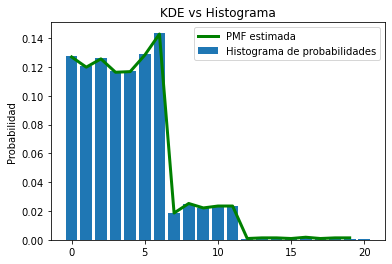

In [141]:
#definimos el grid sobre el que vamos a trabajar
N_2_grid=np.arange(0,20)

#aplicamos nuestra función 
pmf_N2=kde_statsmodels_m(cc, N_2_grid, bandwidth=0.2)

#gráfica
plt.bar(N_2_frec_prob.Valores, N_2_frec_prob.Probabilidad, label='Histograma de probabilidades')
plt.plot(N_2_grid, pmf_N2, label='PMF estimada', color='g', linewidth=3)
plt.xlabel('')
plt.ylabel('Probabilidad')
plt.title('KDE vs Histograma')
plt.legend()
plt.show()

## Método de aceptación y rechazo usando KDE

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernel_density.py:158: RuntimeWarning: invalid value encountered in log
  L += func(f_i)


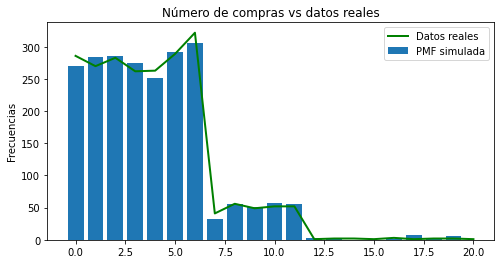

In [142]:
f_kde_n2=kde_statsmodels_func(cc)
pmf_kde_N2=acep_rechazo_simplificada_dis(len(cc), (min(cc),max(cc)), f_kde_n2, max(pmf_N2))

#gráfica
plt.figure(figsize=[8,4])
y,x = np.histogram(pmf_kde_N2,bins = len(set(pmf_kde_N2))) 
plt.bar(list(set(pmf_kde_N2)),y, label='PMF simulada')
plt.plot(N_2_frec_prob.Valores, N_2_frec_prob.Frecuencias, color='g', lw=2, label='Datos reales')
plt.legend()
plt.xlabel('')
plt.ylabel('Frecuencias')
plt.title('Número de compras vs datos reales')
plt.show()

## Método de la transformada inversa para generar números pseudoaleatorios

In [143]:
N_2_frec_prob['Acumulada']=N_2_frec_prob.Probabilidad.cumsum()
N_2_frec_prob.head()

,Valores,Frecuencias,Probabilidad,Acumulada
0,0,286,0.127679,0.127679
1,1,270,0.120536,0.248214
2,2,283,0.126339,0.374554
3,3,262,0.116964,0.491518
4,4,263,0.117411,0.608929


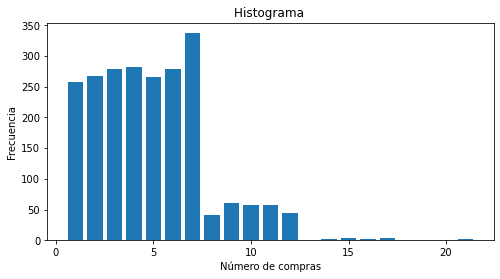

In [155]:
N=len(N_2)
N_2_u=np.random.rand(N) #generamos valores aleatorios
v_N2=Gen_distr_discreta(N_2_u, N_2_frec_prob.Acumulada)+1 #aplicamos función de trasnformada inversa

plot_histogram_discrete(v_N2, 'Número de compras', 'Frecuencia', 'Histograma ') #graficamos

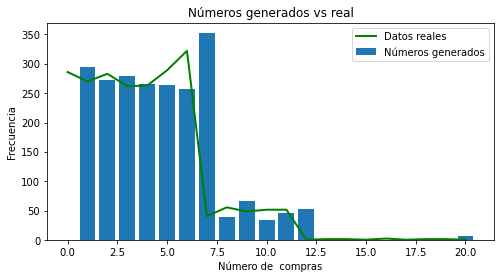

In [145]:
plt.figure(figsize=[8,4])
y,x = np.histogram(v_N2,bins = len(set(v_N2))) 
plt.bar(list(set(v_N2)),y, label= 'Números generados')
plt.plot(N_2_frec_prob.Valores, N_2_frec_prob.Frecuencias, color='g', lw=2, label='Datos reales')
plt.legend()
plt.xlabel('Número de  compras')
plt.ylabel('Frecuencia')
plt.title('Números generados vs real')
plt.show()

In [146]:
# Resumen simulaciones montecarlo
Real_N2 = np.mean(cc)
MTI_N2 = v_N2.mean()
MAR_N2 = pmf_kde_N2.mean()
Resulados_N2 = [Real_N2,MTI_N2,MAR_N2]
df_N2 = pd.DataFrame(Resulados_N2)
df_N2 = df_N2.T
df_N2 = df_N2.rename(columns={0:'Real',1:'MTI',2:'MAR'},
            index = {0:'Resultados N1'})
df_N2

,Real,MTI,MAR
Resultados N1,3.820982,4.788839,3.858482


## Método de reducción de varianza: estratificación uniforme

**Reduccion de varianza para MTI**

In [158]:
f_u2= lambda U: Gen_distr_discreta(U, N_2_frec_prob.Acumulada)+1
U= estra_igualmente_espaciado(N)
valores_estrat_N2 = f_u2(U)
media_estrat_N2 = np.mean(valores_estrat_N2)
sigma_estrat_N2 = np.std(valores_estrat_N2)

print('Media con reducción de varianza estratificada=', media_estrat_N2)
print('La desviación estándar con el método de estratificación es: ', sigma_estrat_N2)

Media con reducción de varianza estratificada= 4.820982142857143
La desviación estándar con el método de estratificación es:  2.9170996664438524


## Método de reducción de varianza: estratificación de rango

**Reduccion de varianza para MTI**

In [159]:
N_2_frec_prob

,Valores,Frecuencias,Probabilidad,Acumulada
0,0,286,0.127679,0.127679
1,1,270,0.120536,0.248214
2,2,283,0.126339,0.374554
3,3,262,0.116964,0.491518
4,4,263,0.117411,0.608929
5,5,289,0.129018,0.737946
6,6,322,0.143750,0.881696
7,7,41,0.018304,0.900000
8,8,56,0.025000,0.925000
9,9,49,0.021875,0.946875


## Método de reducción de varianza: números complementarios

**Reduccion de varianza para MTI**

In [162]:
ri = np.random.rand(N)
ri_c = 1-ri 
U1= f_u2(ri)
U2= f_u2(ri_c)

m4 = (U1.mean()+U2.mean())/2

print('Media por medio del método de números complementarios: ', m4)

Media por medio del método de números complementarios:  4.812946428571429


In [163]:
df_N2['RV_EstU'] = media_estrat_N2
df_N2['RV_Comp'] = m4
df_N2

,Real,MTI,MAR,RV_EstU,RV_Comp
Resultados N1,3.820982,4.788839,3.858482,4.820982,4.812946


## Nodo 3

In [103]:
#histograma para el nodo 3


## Tabla de valores, frecuencias y probabilidad

In [147]:
N_3_frec_prob=pd.DataFrame({'Valores': np.unique(cs, return_counts=True)[0],
                            'Frecuencias':np.unique(cs, return_counts=True)[1]}) 
N_3_frec_prob['Probabilidad']=N_3_frec_prob['Frecuencias']/len(N_1)

N_3_frec_prob.head()


,Valores,Frecuencias,Probabilidad
0,0,194,0.086607
1,1,229,0.102232
2,2,200,0.089286
3,3,231,0.103125
4,4,239,0.106696


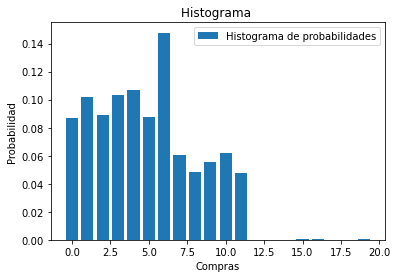

In [148]:
plt.bar(N_3_frec_prob.Valores, N_3_frec_prob.Probabilidad, label='Histograma de probabilidades')
plt.xlabel('Compras')
plt.ylabel('Probabilidad')
plt.title('Histograma ')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernel_density.py:158: RuntimeWarning: invalid value encountered in log
  L += func(f_i)


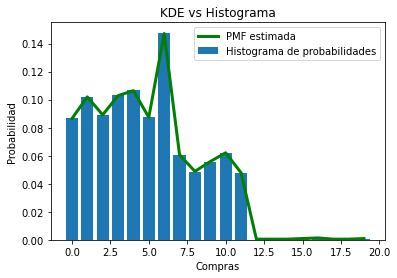

In [149]:
#definimos el grid sobre el que vamos a trabajar
N_3_grid=np.arange(0,20)

#aplicamos nuestra función 
pmf_N3=kde_statsmodels_m(cs, N_3_grid, bandwidth=0.2)

#gráfica
plt.bar(N_3_frec_prob.Valores, N_3_frec_prob.Probabilidad, label='Histograma de probabilidades')
plt.plot(N_3_grid, pmf_N3, label='PMF estimada', color='g', linewidth=3)
plt.xlabel('Compras')
plt.ylabel('Probabilidad')
plt.title('KDE vs Histograma')
plt.legend()
plt.show()

## Método de aceptación y rechazo usando KDE

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernel_density.py:158: RuntimeWarning: invalid value encountered in log
  L += func(f_i)


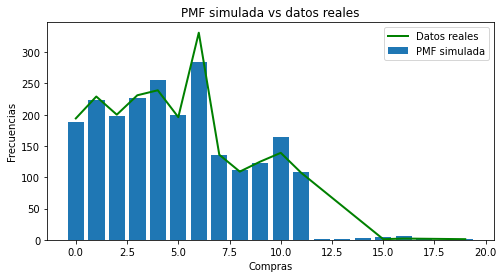

In [150]:
f_kde_n3=kde_statsmodels_func(cs)
pmf_kde_N3=acep_rechazo_simplificada_dis(len(N_3), (0,20), f_kde_n3, max(pmf_N3))

#gráfica
plt.figure(figsize=[8,4])
y,x = np.histogram(pmf_kde_N3,bins = len(set(pmf_kde_N3))) 
plt.bar(list(set(pmf_kde_N3)),y, label='PMF simulada')
plt.plot(N_3_frec_prob.Valores, N_3_frec_prob.Frecuencias, color='g', lw=2, label='Datos reales')
plt.legend()
plt.xlabel('Compras')
plt.ylabel('Frecuencias')
plt.title('PMF simulada vs datos reales')
plt.show()

## Método de la transformada inversa para generar números pseudoaleatorios

In [151]:
#Se añade la probabilidad acumulada
N_3_frec_prob['Acumulada']=N_3_frec_prob.Probabilidad.cumsum()
N_3_frec_prob.head()

,Valores,Frecuencias,Probabilidad,Acumulada
0,0,194,0.086607,0.086607
1,1,229,0.102232,0.188839
2,2,200,0.089286,0.278125
3,3,231,0.103125,0.381250
4,4,239,0.106696,0.487946


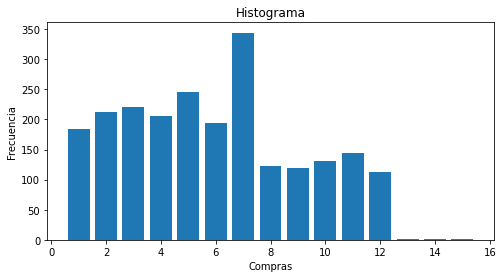

In [152]:
N=len(cs) #números a generar
N_3_u=np.random.rand(N) #generamos números aleatorios entre 0 y 1
v_N3=Gen_distr_discreta(N_3_u, N_3_frec_prob.Acumulada) +1#aplicamos el método de la transformada inversa

plot_histogram_discrete(v_N3, 'Compras', 'Frecuencia', "Histograma")

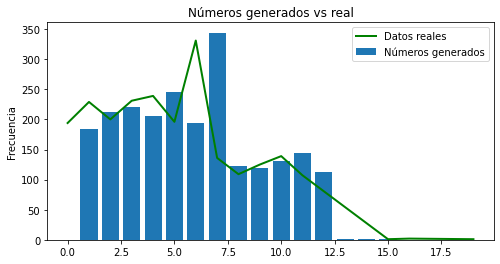

In [153]:
plt.figure(figsize=[8,4])
y,x = np.histogram(v_N3,bins = len(set(v_N3))) 
plt.bar(list(set(v_N3)),y, label= 'Números generados')
plt.plot(N_3_frec_prob.Valores, N_3_frec_prob.Frecuencias, color='g', lw=2, label='Datos reales')
plt.legend()
plt.xlabel('')
plt.ylabel('Frecuencia')
plt.title('Números generados vs real')
plt.show()

In [164]:
# Resumen simulaciones montecarlo
Real_N3 = np.mean(cc)
MTI_N3 = v_N2.mean()
MAR_N3 = pmf_kde_N3.mean()
Resulados_N3 = [Real_N3,MTI_N3,MAR_N3]
df_N3 = pd.DataFrame(Resulados_N3)
df_N3 = df_N3.T
df_N3 = df_N3.rename(columns={0:'Real',1:'MTI',2:'MAR'},
            index = {0:'Resultados N1'})
df_N3

,Real,MTI,MAR
Resultados N1,3.820982,4.884375,4.962946


## Método de reducción de varianza: estratificación uniforme

**Reduccion de varianza para MTI**

In [165]:
f_u3 = lambda U: Gen_distr_discreta(U, N_3_frec_prob.Acumulada)+1
U = estra_igualmente_espaciado(N)
valores_estrat_N3 = f_u3(U)
media_estrat_N3 = np.mean(valores_estrat_N3)
sigma_estrat_N3 = np.std(valores_estrat_N3)

print('Media con reducción de varianza estratificada=', media_estrat_N3)
print('La desviación estándar con el método de estratificación es: ', sigma_estrat_N3)

Media con reducción de varianza estratificada= 5.826785714285714
La desviación estándar con el método de estratificación es:  3.1939390744384104


## Método de reducción de varianza: estratificación de rango

**Reduccion de varianza para MTI**

In [166]:
N_3_frec_prob

,Valores,Frecuencias,Probabilidad,Acumulada
0,0,194,0.086607,0.086607
1,1,229,0.102232,0.188839
2,2,200,0.089286,0.278125
3,3,231,0.103125,0.381250
4,4,239,0.106696,0.487946
5,5,196,0.087500,0.575446
6,6,331,0.147768,0.723214
7,7,136,0.060714,0.783929
8,8,109,0.048661,0.832589
9,9,125,0.055804,0.888393


## Método de reducción de varianza: números complementarios

**Reduccion de varianza para MTI**

In [167]:
ri = np.random.rand(N)
ri_c = 1-ri 
U1= f_u3(ri)
U2= f_u3(ri_c)

m4 = (U1.mean()+U2.mean())/2

print('Media por medio del método de números complementarios: ', m4)

Media por medio del método de números complementarios:  5.833928571428571


In [168]:
df_N2['RV_EstU'] = media_estrat_N3
df_N2['RV_Comp'] = m4
df_N2

,Real,MTI,MAR,RV_EstU,RV_Comp
Resultados N1,3.820982,4.788839,3.858482,5.826786,5.833929


## Nodo 4 o Nodo Principal